In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
from matplotlib import gridspec
import matplotlib as mpl

In [171]:
data = pd.read_csv('running_stats_runtastic.csv')
data = data[:-1]
data.set_index('Date ',inplace=True)
data = data.drop('27.07.15')
data['distance (km)'] = data.distance.str[:-2].astype(float)
data.time = ['00:'+f if len(f.split(':'))==2 else f for f in data.time]
data.time = ['00:'+f.split(':')[0]+':'+f.split(':')[1] if int(f.split(':')[0])>=4 else f for f in data.time]

In [172]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
def get_min(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 60 + int(m) + int(s)/60
def get_pace(time_str):
    m,s = time_str.split(':')
    return int(m)+ int(s)/60


In [173]:
data['time (min)'] = [get_min(f) for f in data.time]
data['time (s)'] = [get_sec(f) for f in data.time]
data['pace (min)'] = [get_pace(f) for f in data.pace]

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


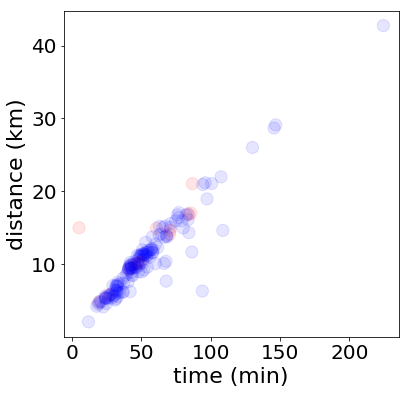

In [197]:
lut = {'yes':'r','no':'b'}
color = data.race.map(lut)
kwargs = {'figsize':(6,6),'alpha':.1,'s':150,'fontsize':20,'colors':color}
data[data.type=='Running'].plot.scatter('time (min)','distance (km)',**kwargs)
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.labelsize'] = 22
plt.show()

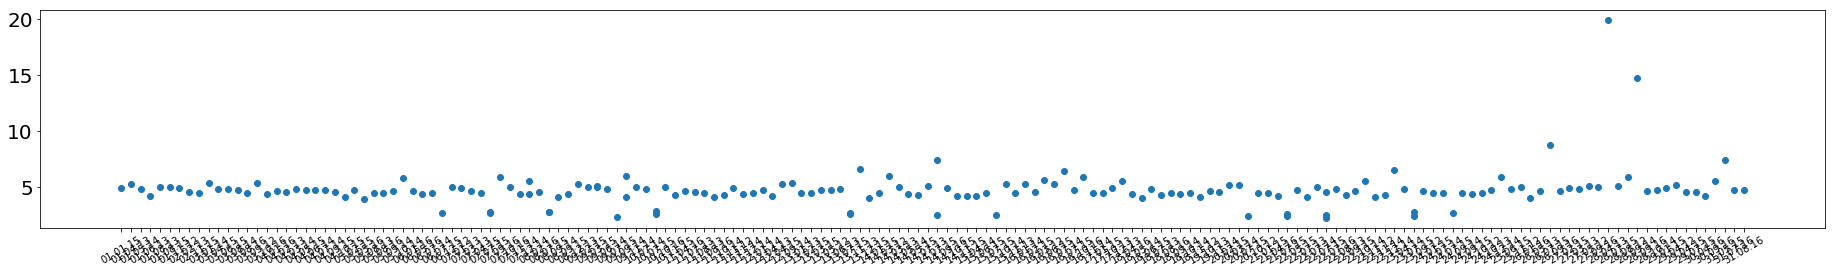

In [195]:
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%d/%m/%y')

f,ax = plt.subplots()
plt.scatter(data.index,data['pace (min)'])
f.set_figwidth(32)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
#ax.xaxis.set_major_locator(loc)
#ax.xaxis.set_major_formatter(formatter)
plt.show()
f.savefig('test.png')

In [191]:
formatter